## CV 算法

In [1]:
import statistics
import numpy as np
import pandas as pd

def calc_unstable_factor(values):
    unstable_factor = np.NaN
    for i in range(len(values)):
        pre_half = values[0 : i]
        lst_half = values[i : len(values)]
        
        pre_half_factor = statistics.stdev(pre_half) / statistics.mean(pre_half) if len(pre_half) > 1 else 0.0
        lst_half_factor = statistics.stdev(lst_half) / statistics.mean(lst_half) if len(lst_half) > 1 else 0.0
        factor = pre_half_factor + lst_half_factor
        #print("pre={}, lst={}, factor={}".format(pre_half_factor, lst_half_factor, factor))

        if pd.isnull(unstable_factor) or unstable_factor > factor:
            unstable_factor = factor
    #print(unstable_factor)
    return unstable_factor

def calc_cv(values):
    return statistics.stdev(values) / statistics.mean(values)



rolling window = 6

mean of dataset: 113.185
stdev of dataset: 20.931569081426417
          uf        cv
0   0.000000       NaN
1   0.000000  0.010477
2   0.010314  0.010314
3   0.009975  0.009975
4   0.009975  0.014521
5   0.012043  0.016255
6   0.016225  0.016325
7   0.018253  0.018523
8   0.018679  0.111771
9   0.110285  0.110285
10  0.110851  0.110851
11  0.109017  0.109017
12  0.119515  0.229062
13  0.229390  0.229390
14  0.235308  0.235308
15  0.237270  0.237270
16  0.251246  0.266820
17  0.242155  0.263849
18  0.227604  0.227604
19  0.227213  0.227213
          uf        cv
0   0.000000       NaN
1   0.000000  0.010477
2   0.010314  0.010314
3   0.009975  0.009975
4   0.009975  0.014521
5   0.012043  0.016255
6   0.015918  0.015918
7   0.015918  0.016240
8   0.016240  0.091175
9   0.086240  0.086240
10  0.088085  0.088085
11  0.088319  0.088319
12  0.093514  0.196785
13  0.195752  0.195752
14  0.193360  0.193360
15  0.191931  0.191931
16  0.199823  0.228962
17  0.229397  0.229397
18  0.236208  0.23

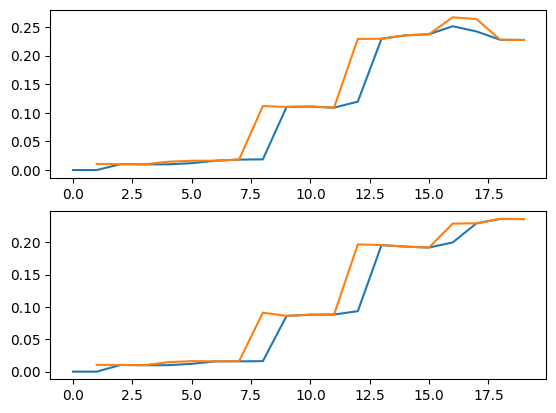

In [3]:
import statistics
import numpy as np
import matplotlib.pyplot as plt

arr = [106.90, 103.68, 106.13, 170.30, 104.57, 106.72, 106.49, 172.12, 103.99, 102.27, 106.52, 134.19, 106.77, 106.11, 102.42, 102.72, 104.61, 106.61, 104.51, 106.07]
print('mean of dataset: {}'.format(statistics.mean(arr)))
print('stdev of dataset: {}'.format(statistics.stdev(arr)))

var_6 = pd.DataFrame()
var_6['uf'] = pd.Series(reversed(arr)).rolling(6, min_periods=1).apply(calc_unstable_factor)
var_6['cv'] = pd.Series(reversed(arr)).rolling(6, min_periods=2).apply(calc_cv)
print(var_6)

var_10 = pd.DataFrame()
var_10['uf'] = pd.Series(reversed(arr)).rolling(10, min_periods=1).apply(calc_unstable_factor)
var_10['cv'] = pd.Series(reversed(arr)).rolling(10, min_periods=2).apply(calc_cv)
print(var_10)

fig, axes = plt.subplots(2, 1)
axes[0].plot(var_6)
axes[1].plot(var_10)